Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | CPE 313-CPE32S3 - Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | Calamba, Liam Francis
**Section** | CPE31S3
**Date Performed**: | 2 21 25
**Date Submitted**: | 2 21 25
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

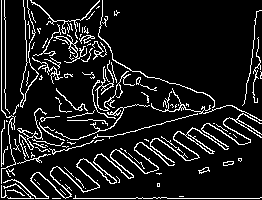

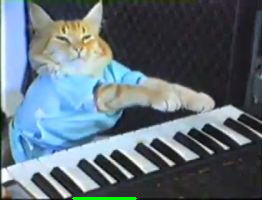

In [ ]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
2. What is the mathematical formula for Hough transform and explain how it finds lines.

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

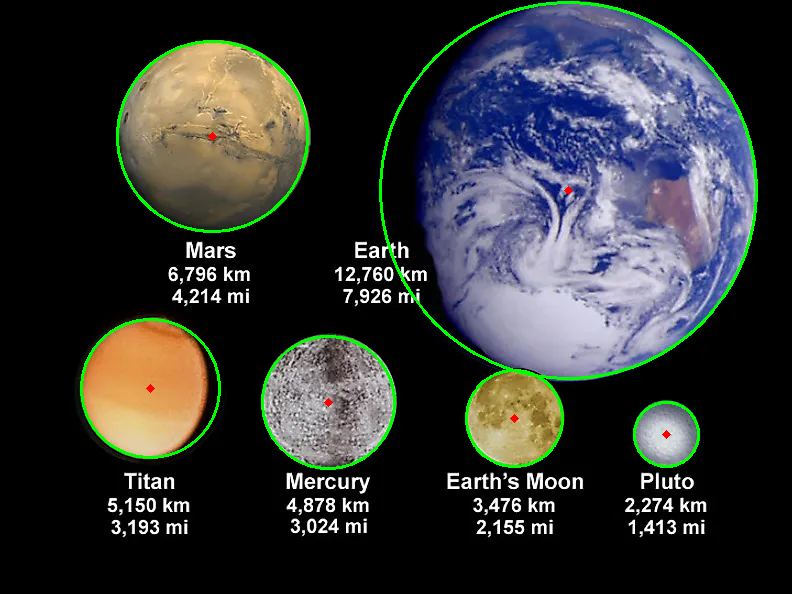

In [ ]:
import cv2
import numpy as np

# Our testing value
n = 19

planets = cv2.imread('/content/planets.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

- it identifees a lot of centers for circles and correectly identified only 3 of the planets, it is all over the image.

Change the value to 9, **what happens to the image**?

- still looks like the first image with n=5 but a little less all over.

Lastly, change the value to 15, **what can you say about the resulting image?**

- it identified almost all except the earth, it just barely did it with 3 circles inside of earth, theres still some missclassifications.

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

- it is because of the preprocessing that we do (grayscaling mkaing the image simpler) and change the values of in this case the n=[], it is the blur to reduce the noise of the imge which hinders the houghcicles detection, the lower the value of n the more noise, and the higher tha value of n the lesser the noise and the better performance.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

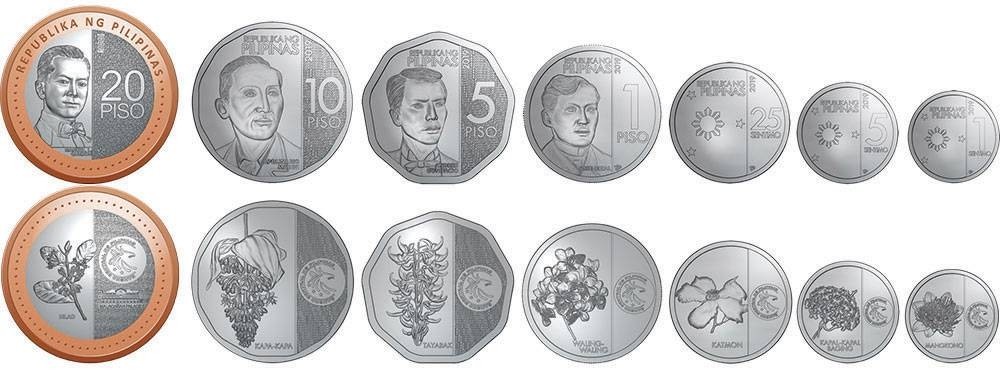

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?

LINEDET:

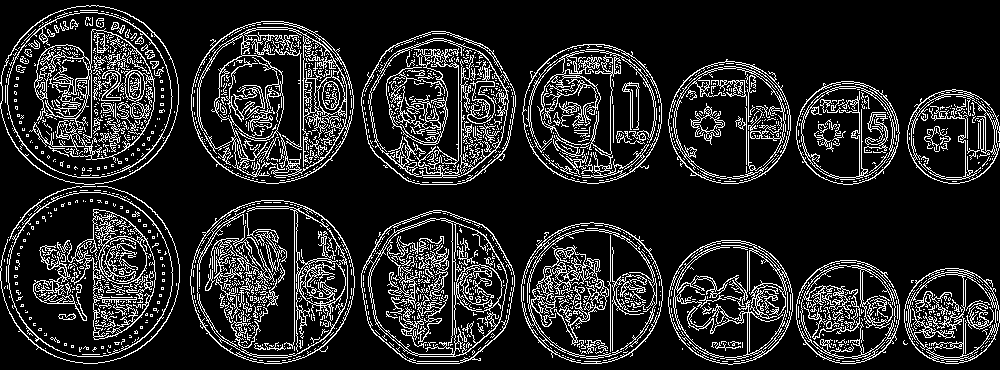

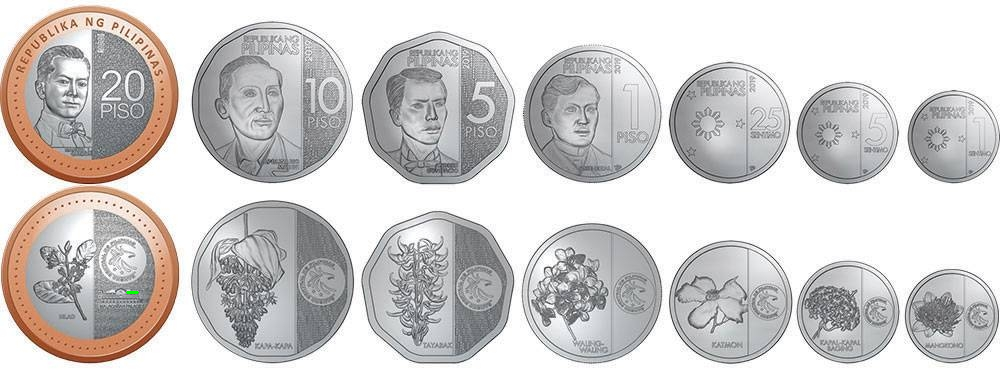

In [ ]:
limg = cv2.imread('/content/pcoins.jpg')
lgray = cv2.cvtColor(limg,cv2.COLOR_BGR2GRAY)
ledges = cv2.Canny(lgray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(ledges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(limg,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(ledges)
cv2_imshow(limg)

In [ ]:
def count_coins_lines(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 120)
    minLineLength = 20
    maxLineGap = 5
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength, maxLineGap)

    if lines is not None:
      for x1,y1,x2,y2 in lines[0]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

    cv2_imshow(edges)

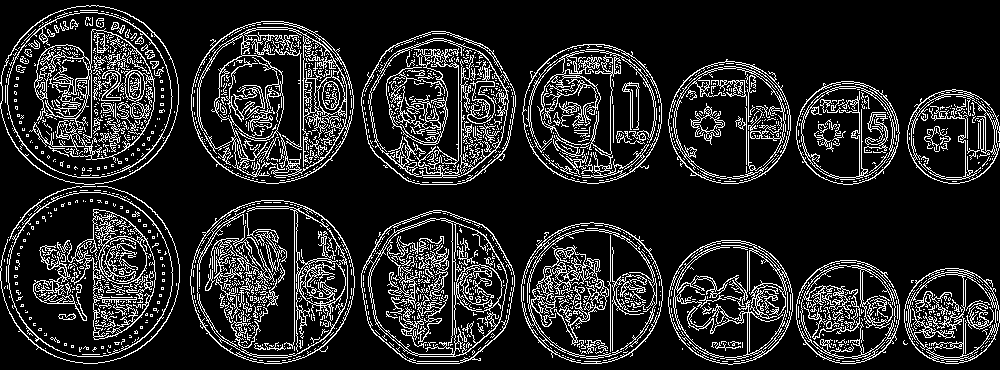

In [ ]:
count_coins_lines('/content/pcoins.jpg')

- Based on the output, it's not suitable, yes we can count it becuase it outlined the coins, but computers may not be able to because what it counts are the lines and there are a lot of lines there, it's used to outline the coins.

HOUGHCIRCLES:

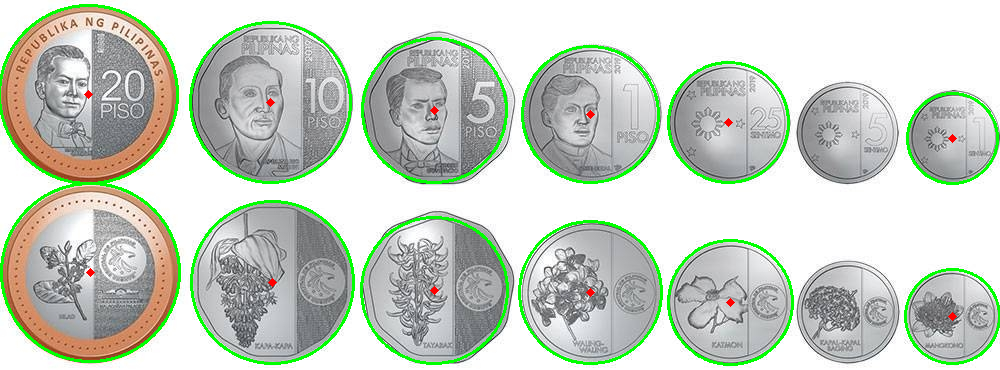

In [ ]:
# referece from procedure
# also y not detecting that one coin whahahahaha
# n = 21

# pcoins = cv2.imread('/content/pcoins.jpg')
# pgray_img = cv2.cvtColor(pcoins, cv2.COLOR_BGR2GRAY)
# pimg = cv2.medianBlur(pgray_img, n)
# pcimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
# scircles = cv2.HoughCircles(pimg,cv2.HOUGH_GRADIENT,1,120,
#                             param1=80,param2=32,minRadius=20,
#                                 maxRadius=100)
# scircles = np.uint16(np.around(scircles))

# for i in scircles[0,:]:
#   # draw the outer circle
#   cv2.circle(pcoins,(i[0],i[1]),i[2],(0,255,0),2)
#   # draw the center of the circle
#   cv2.circle(pcoins,(i[0],i[1]),2,(0,0,255),3)

# cv2.imwrite("spcoins.jpg", pcoins)
# cv2_imshow(pcoins)

In [61]:
def detect_circles(image_path, dp=1.1, minDist=40, param1=80, param2=30, minRadius=20, maxRadius=100):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 21) #Using the same blur as the example

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT, dp=dp, minDist=minDist,
        param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius
    )

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 4)  # Draw outer circle
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)  # Draw center

        cv2_imshow(img)
        print(f"Number of coins detected: {len(circles[0])}")

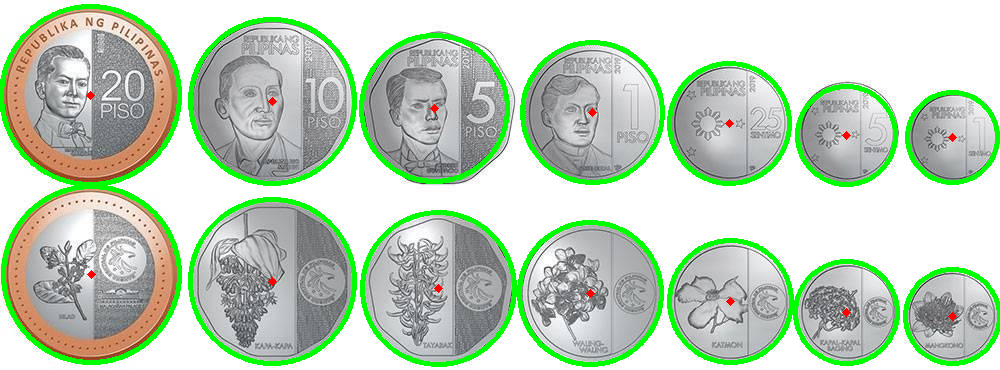

Number of coins detected: 14


In [62]:
detect_circles('/content/pcoins.jpg')

- HoughCircles however is really suitable to use for counting the coins, it identified them all exactly, and they're all traced accordingly, although I had to do some searching to get the circle detection to work on the 5 centavo (look at the previous output above ↑) as I used the procedure example as a reference, and also fixing the n just like in the procedure and now it works fine👍.

## 5. Summary, Conclusions and Lessons Learned

In this activuty I learned about using hough transofrmm to detect objects by identifying lines and circles in an image, I was able to utilize them for the supplementary activity, to create a function that detects and count coins, and in that activity I was able to clearly contrast them, what I can use them for, based on their outputs, on houghlines it is good at tracing things, it has a lot of variability in it, while on the houghcircles, it's in the name, good at detecting circles it may not sound that impressive, but there are a lot of things that it can be applied to and it is really useful. Both of them are important in identifying edges and countours and will be more important on the later parts where we will be detecting faces and more objects that are not just simple shapes.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*